In [1]:
from keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [2]:
TRAIN_DIR = "images/train"
TEST_DIR = "images/test"

In [3]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label,"completed")
    return image_paths,labels

In [4]:
train = pd.DataFrame()
train['image'],train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [5]:
print(train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [6]:
test = pd.DataFrame()
test['image'],train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [7]:
print(test)
print(test['image'])

                                image
0            images/train\angry\0.jpg
1            images/train\angry\1.jpg
2           images/train\angry\10.jpg
3        images/train\angry\10002.jpg
4        images/train\angry\10016.jpg
...                               ...
28816  images/train\surprise\9969.jpg
28817  images/train\surprise\9985.jpg
28818  images/train\surprise\9990.jpg
28819  images/train\surprise\9992.jpg
28820  images/train\surprise\9996.jpg

[28821 rows x 1 columns]
0              images/train\angry\0.jpg
1              images/train\angry\1.jpg
2             images/train\angry\10.jpg
3          images/train\angry\10002.jpg
4          images/train\angry\10016.jpg
                      ...              
28816    images/train\surprise\9969.jpg
28817    images/train\surprise\9985.jpg
28818    images/train\surprise\9990.jpg
28819    images/train\surprise\9992.jpg
28820    images/train\surprise\9996.jpg
Name: image, Length: 28821, dtype: object


In [8]:
from tqdm.notebook import tqdm

In [9]:
def extract_features(images):
    features =[]
    for image in tqdm(images):
        img = load_img(image,color_mode='grayscale')
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [32]:
train_features = extract_features(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

In [33]:
test_features = extract_features(test['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

In [ ]:
x_train = train_features/255.0
x_test = test_features/255.0

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
le.fit(train['label'])

In [ ]:
y_train = le.transform(train['label'])

In [ ]:
test['label'] = train['label'] 

In [ ]:
y_test = le.transform(test['label'])

In [ ]:
y_train = to_categorical(y_train,num_classes=7)
y_test = to_categorical(y_test,num_classes=7)

In [ ]:
model = Sequential()
model.add(Conv2D(128 , kernel_size=(3,3) , activation = 'relu' , input_shape=(48,48,1)))
model.add(MaxPooling2D (pool_size=(2,2)) )
model.add(Dropout(0.4))

model.add(Conv2D(256 , kernel_size=(3,3) , activation = 'relu'))
model.add(MaxPooling2D (pool_size=(2,2)) )
model.add(Dropout(0.4))

model.add(Conv2D(512 , kernel_size=(3,3) , activation = 'relu'))
model.add(MaxPooling2D (pool_size=(2,2)) )
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(7 , activation = 'softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x= x_train , y= y_train , batch_size = 128 , epochs = 100 , validation_data=(x_test , y_test))

In [ ]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [10]:
from keras.models import model_from_json

In [11]:
json_file=open("emotiondetector.json",'r')
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [12]:
label = ["angry","disgust","fear","happy","neutral","sad","suprise"]

In [13]:
def ef(image):
    img = load_img(image , color_mode="grayscale")
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [14]:
image = "images/train/angry/43.jpg"
print("original image is of angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("Model prediction is ",pred_label)

original image is of angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step
Model prediction is  angry


In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Model prediction is  happy


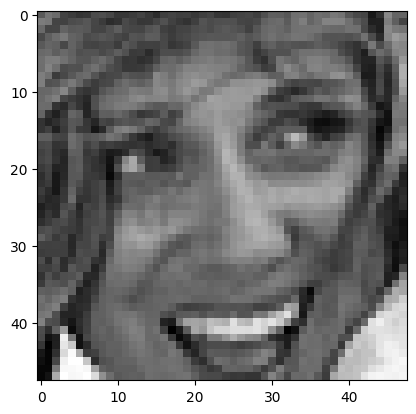

In [16]:
image = "images/train/happy/32.jpg"
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("Model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap="gray")